# What is EDA?

- Exploratory Data Analysis (EDA) is a method used to analyze and summarize datasets. 
- It will give you the basic understanding of your data, it’s distribution, null values and much more.
- You can either explore data using graphs or through some python functions.
- There are three type of analysis. Univariate, Bivariate and Multivariate. In the univariate, you will be analyzing a single attribute. But in the bivariate, you will be analyzing an attribute with the target attribute. And in Multivariate, you will be analyzing multipule attribute together.
- In the non-graphical approach, you will be using functions such as shape, summary, describe, isnull, info, datatypes and more.
- In the graphical approach, you will be using plots such as scatter, box, bar, density and correlation plots.

#### In this notebook we will only look **univariate analysis**.

## Which dataset we are going to use?

#### Titanic Dataset

- It is one of the most popular datasets used for understanding machine learning basics. It contains information of all the passengers aboard the RMS Titanic, which unfortunately was shipwrecked. This dataset can be used to predict whether a given passenger survived or not. 

##### The Titanic Dataset contains following attributes:

- PassengerID : Unique ID of a passenger
- Survived: If the passenger survived(0-No, 1-Yes)   **Target Feature**
- Pclass: Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name: Name of the passenger
- Sex: Male/Female
- Age: Passenger age in years
- SibSp: No of siblings/spouses abroad
- Parch: No of paents/children abroad
- Ticket: Ticket Number
- Fare: Passenger Fare
- Cabin: Cabin Number
- Embarked: Port of Embarkation(C = Cherbough, Q = Queenstown, S = Southampton)

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
#Load the data
df = pd.read_csv('titanic.csv')
 
#View the data
df.head()

#shape of data
print(f"Number of records present in given dataset is: {df.shape[0]} ")
print(f"Number of attributes present in given dataset is: {df.shape[1]} ")

Number of records present in given dataset is: 891 
Number of attributes present in given dataset is: 12 


In [2]:
#Sample of data
#Gives random 10 data points from whole data
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
721,722,0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,350048,7.0542,NaN,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C


### Basic information about data – EDA
- The df.info() function will give us the basic information about the dataset. 
- For any data, it is good to start by knowing its information such as data type, null values and many more.


- df.describe() function Generate descriptive statistics.
- Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

In [3]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Describe the data
df.describe(include="float64")

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [5]:
df.describe(include="int64")

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [6]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Duplicate values

- We can use the df.duplicate.sum() function to the sum of duplicate value present if any. 
- It will show the number of duplicate values if they are present in the data.

In [7]:
#Find the duplicates 
df.duplicated().sum()

0

#### No duplicate value is present.

### Find the Null values
- Finding the null values is the most important step in the EDA. 
- As it is told many a time, ensuring the quality of data is paramount. 
- So, let’s see how we can find the null values.

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

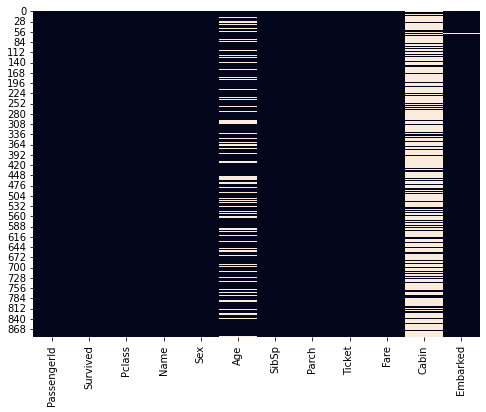

In [9]:
#We can also try heat map to visualize null values
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar= False)

- Clearly visible form heat map and python code that we have null values in Age and Cabin attributes.

### Graphical Method for Univariate Analysis

## 1. Categorical Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
x = df["Survived"].value_counts()[0]
y = df["Survived"].value_counts()[1]

print(f"Number of people survived: {x}")
print(f"Number of people died: {y}")

Number of people survived: 549
Number of people died: 342


In [12]:
male = df["Sex"].value_counts()[0]
female = df["Sex"].value_counts()[1]

print(f"Number of male passenger: {male}")
print(f"Number of female passenger: {female}")

Number of male passenger: 577
Number of female passenger: 314


In [13]:
df["Pclass"].value_counts()[1]

216

In [14]:
first_class = df["Pclass"].value_counts()[1]
second_class = df["Pclass"].value_counts()[2]
third_class = df["Pclass"].value_counts()[3]


print(f"Number of 1st class passenger: {first_class}")
print(f"Number of 2nd class passenger: {second_class}")
print(f"Number of 3rd class passenger: {third_class}")

Number of 1st class passenger: 216
Number of 2nd class passenger: 184
Number of 3rd class passenger: 491


In [15]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
s_embark = df["Embarked"].value_counts()[0]
c_embark = df["Embarked"].value_counts()[1]
q_embark = df["Embarked"].value_counts()[2]


print(f"Number of passenger embarked from Southampton: {s_embark}")
print(f"Number of passenger embarked from Cherbough: {c_embark}")
print(f"Number of passenger embarked from Queenstown: {q_embark}")

Number of passenger embarked from Southampton: 644
Number of passenger embarked from Cherbough: 168
Number of passenger embarked from Queenstown: 77


### a. Countplot

- Countplot to plot count of each category of categorical feature

In [17]:
import warnings
warnings.filterwarnings("ignore")

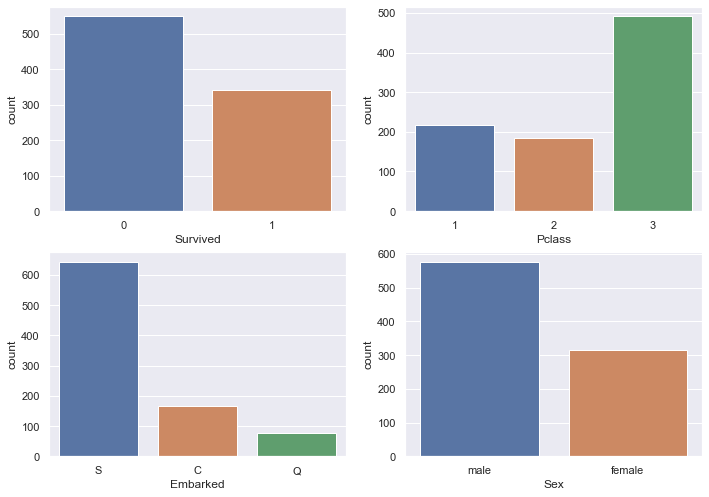

In [19]:
# define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2)

# set seaborn ascetic
sns.set(rc={'figure.figsize':(11.7,8.27)})

# create chart in each subplot
p1 = sns.countplot(df["Survived"], ax=axes[0,0])
p2 = sns.countplot(df["Pclass"], ax=axes[0,1])
p3 = sns.countplot(df["Embarked"], ax=axes[1,0])
p4 = sns.countplot(df["Sex"], ax=axes[1,1])

### b. Pie Chart

- For getting percentage of each category of a categorical feature, we can make use of pie chat.

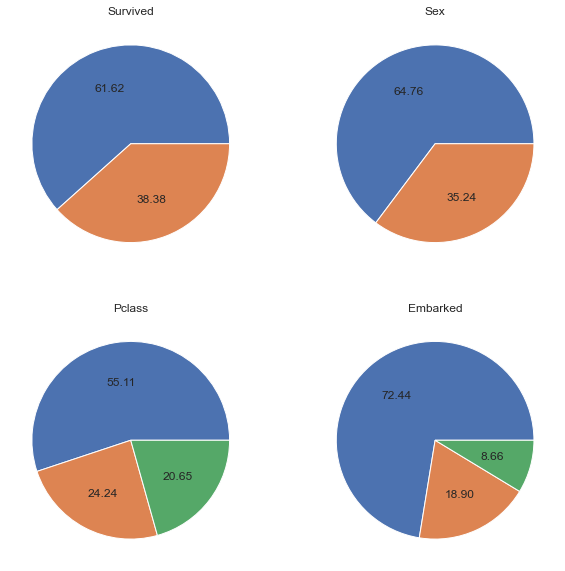

In [20]:
# set figure size for plot
plt.figure(figsize=(10,10))

# first plot
plt.subplot(2,2,1)
plt.pie(df["Survived"].value_counts(), autopct='%.2f')
plt.title("Survived")

# second plot
plt.subplot(2,2,2)
plt.pie(df["Sex"].value_counts(), autopct='%.2f')
plt.title("Sex")

# third plot
plt.subplot(2,2,3)
plt.pie(df["Pclass"].value_counts(), autopct='%.2f')
plt.title("Pclass")

# fourth plot
plt.subplot(2,2,4)
plt.pie(df["Embarked"].value_counts(), autopct='%.2f')
plt.title("Embarked")

# to plot
plt.show()

## Numerical Data

### a. Histogram

- A great way to get started exploring a single variable is with the histogram. A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis.

#### Age Attribute:

In [28]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
# A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. 
# A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 
# A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

df["Age"].skew()

0.38910778230082704

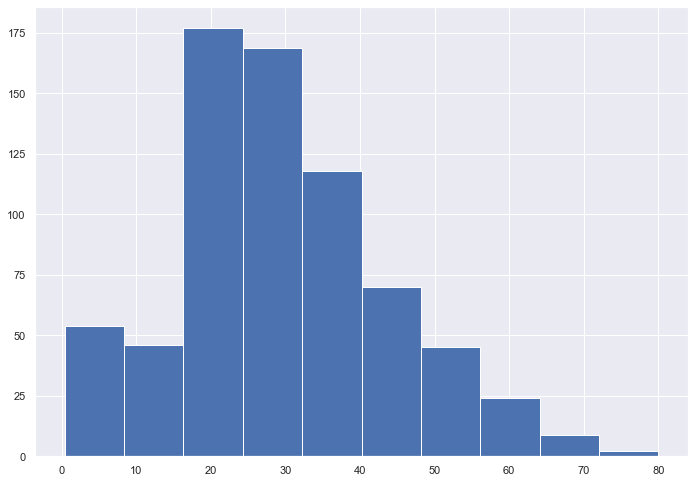

In [40]:
plt.hist(df["Age"])
plt.show()

### b. Distribution Plot

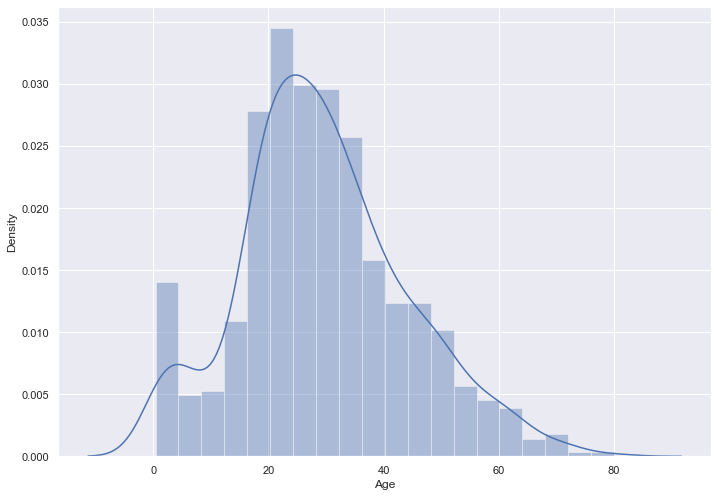

In [30]:
sns.distplot(df["Age"])
plt.show()

### c. Boxplot
- Boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. 
- Very useful for finding outliers in numerical data.

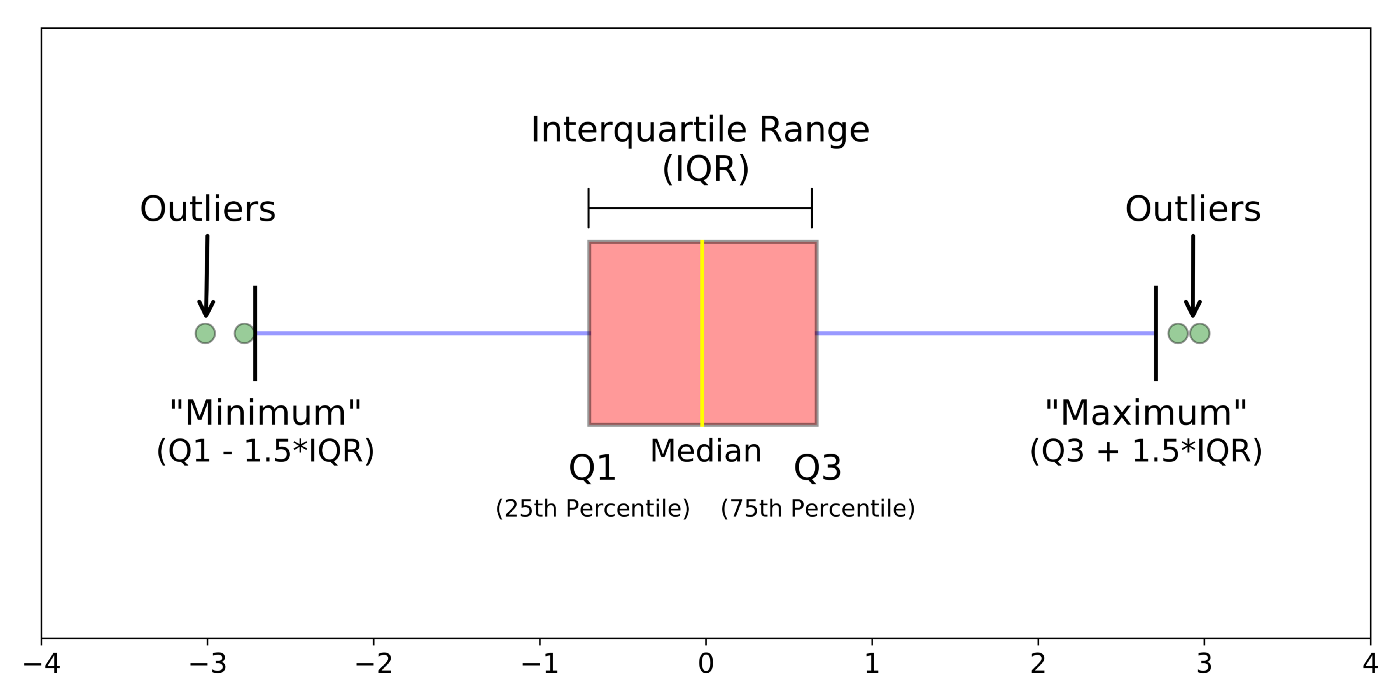

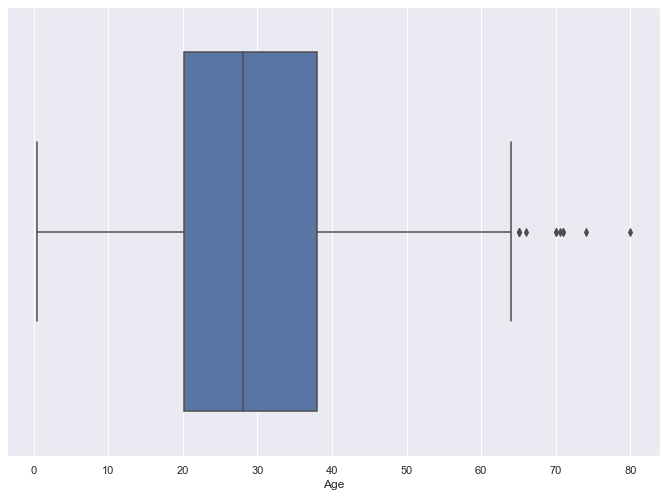

In [51]:
sns.boxplot(df["Age"])
plt.show()

#### Fare Attribute:

In [41]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

- Minimum fare is zero, which is not sounding good. Lets try to find out why it is so.

- It may possible that because of wrong entry.

In [46]:
df[df["Fare"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [45]:
len(df[df["Fare"]==0])

15

- Total 15 records are having Fare zero.
- And all 15 persons are among three different class.
- All 15 persons embarked from Southampton.
- All are male.
- This is result of wrong entry.

In [47]:
# A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. 
# A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 
# A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

df["Fare"].skew()

4.787316519674893

### a. Histogram

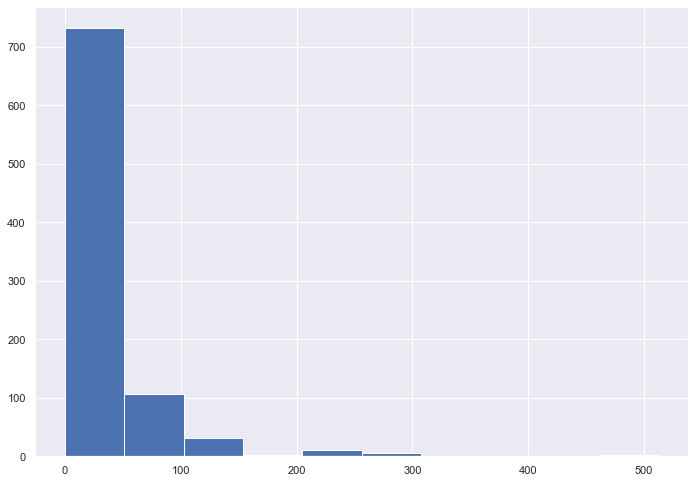

In [48]:
plt.hist(df["Fare"])
plt.show()

##### Highly Right Skewed

### b. Distrbution Plot

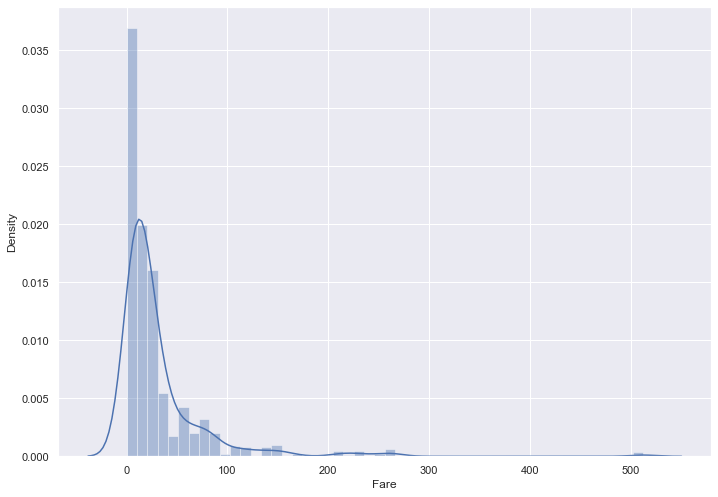

In [49]:
sns.distplot(df["Fare"])
plt.show()

### c. Box plot

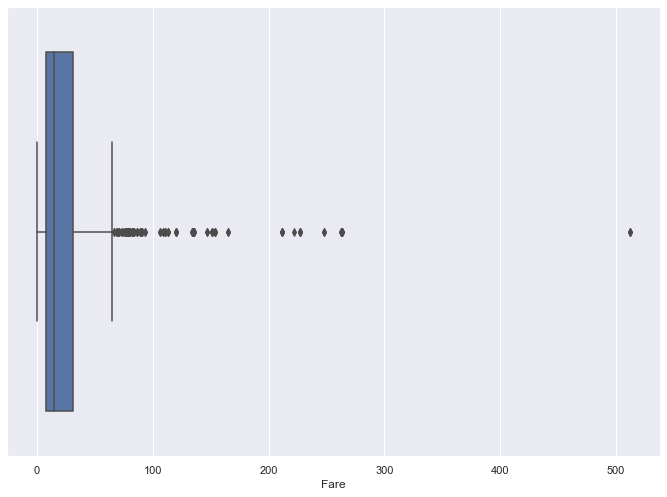

In [52]:
sns.boxplot(df["Fare"])
plt.show()

- That all for this notebook: EDA using Univariate Analysis
- There are lots of method and approach out there, which we can ue for analyzing our features of data.
- That totally depend over your use case and what you want to know from data.
- The questions you will be asking from data are going to be different in each case.
- There is no hard and rule that we should go like this or like that. These things totally depends over your experiment and use case.

### Next Notebook: EDA using Bivariate and Multivariate Analysis.